# Notebook for methods 2 and 3 for CBIP

The goal of these 2 methods is two find independent subsets in order to give the new vertex its colour

In [1]:
import random
from itertools import combinations
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
seed = 1234
random.seed(seed)

In [2]:
def generate_graph_from_dictionnary(dico):
  l = len(dico)
  #adjacency matrix construction
  matrix = np.zeros((l,l))
  for v, n in dico.items():
    #print(v,n)
    for vertex in n:
      matrix[int(v)][int(vertex)]=1.
  print(matrix)

  G = nx.from_numpy_array(matrix, create_using = nx.MultiGraph())

  pos = nx.spring_layout(G)
  nx.draw_networkx(G,pos)
  plt.show()

  return(matrix,G)

[[0. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]]


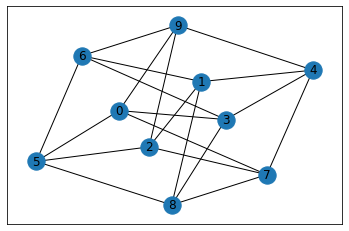

In [3]:
#graph from the project guidelines
example_CBIP = {0:[3,5,7,9],1:[2,4,6,8],2:[1,5,7,9],3:[0,4,6,8],4:[1,3,7,9],5:[0,2,6,8],6:[1,3,5,9],7:[0,2,4,8],8:[1,3,5,7],9:[0,2,4,6]}
matrix, G = generate_graph_from_dictionnary(example_CBIP)

In [4]:
def GenerateGraph(n,p):
    V = set([v for v in range(n)])
    E = set()
    E_dict = {}
    for v in V:
        E_dict[str(v)] = []
    for combination in combinations(V,2):
        a = random.random()
        if a < p:
            E.add(combination)
            E_dict[str(combination[0])].append(str(combination[1]))
            E_dict[str(combination[1])].append(str(combination[0]))
    g = nx.Graph()
    g.add_nodes_from(V)
    g.add_edges_from(E)
    
    return g, V, E, E_dict


### To display a graph with only a few vertices revealed

In [5]:

def get_neighbors(matrix,i):
  neighbours = []
  L = matrix.shape[0]
  for v in range(L):
    if matrix[i][v] == 1:
      neighbours.append(v)
  return neighbours
  
def reveal_neighbors(matrix, i):
  neighbors = []
  L = matrix.shape[0]
  for v in range(L):
    if matrix[i][v] == 1:
      neigh = v
    #vertices that are already displayed
      if neigh < i:
        neighbors.append(neigh)
  return neighbors
 

def vertices_non_neighbors(vertex,matrix,V):
  #all the neighbours of the vertex of interest
  neighbours = get_neighbors(matrix,i)
  
  #print("Neihbours are = ",neighbours)
  #neighbours.append(vertex)
  non_neighbours = list(V.copy())
  to_delete = []
  l = len(non_neighbours)

  #which vertex are neighbors ?
  for n in neighbours:
    n=int(n)
    for v in range(l):
      vertex = int(non_neighbours[v])
      if (n==vertex):
        to_delete.append(v) 
  to_delete.sort()

  #deleteting them
  for i in range(len(to_delete)-1,-1,-1):
    non_neighbours.pop(to_delete[i]) 
  return non_neighbours

#new non neighbour function using only the adjacency matrix
def non_neighbour_i(vertex,matrix,remain):
  non_n=[]

  #print("Vertex = ",vertex,"matrix = ",matrix)
  #print("Shape = ",matrix.shape,"and vertex = ",vertex)
  #working_matrix = matrix
  for k in range(matrix.shape[0]):
    if matrix[vertex][k]==0:
      non_n.append(k)
  non_n_non_remain = []
  #check if the vertices are in remain
  if remain != None:
    for i in range(len(non_n)):
      count = 0
      for r in remain:
        if non_n[i]==r:
          count += 1
      if count > 0:
        non_n_non_remain.append(non_n[i])
    return(non_n_non_remain)
  return(non_n)

# among a subset, this function gives the score of each vertex (+1 if this vertex has a neighbour among the subset)
# using adjacency matrix
def score(subset,matrix):
  score = len(subset)*[0] 
  for i in range(len(subset)):
    x = subset[i]
    for j in range(len(subset)):
      y = subset[j]
      score[i] = score[i]+matrix[x][y]
  return(score)


#outputs the difference between two sets of vertices
def remaining(ref,sous_set):
  remaining = ref.copy()
  to_delete = []
  for r in range(len(ref)):
    for s in sous_set:
      s=int(s)
      ref_vertex = int(ref[r])
      if s==ref_vertex:
        to_delete.append(r)
  for i in range(len(to_delete)-1,-1,-1):
    remaining.pop(to_delete[i])
  return(remaining)
  

In [6]:
def get_matrix_i(matrix,i):
  new_matrix = np.zeros((i+1,i+1))
  for x in range(i+1):
    for y in range(i+1):
      new_matrix[x][y]=matrix[x][y]
  return(new_matrix) 

def plot_partial_graph(i,matrix):
  vertices = reveal_neighbors(matrix,i)
  
  #computing new adjacency matrix
  new_matrix = get_matrix_i(matrix,i)
  #print("New adjacency matrix for ",i," vertices revealed")
  #print(new_matrix)
  return(new_matrix)

## Finding Independent Subset

### 1st idea


1.   When a new vertex is revealed, we create a set that includes this vertex (NEW) and all it's non neighbors (NN). *Let's call this set S = (NEW) U (NN)*
2.   We don't want any neighbors to be in NN as we have to make this set as an independent set. Therefore, we are going to sort among the non neighbors:
*   If there is a conflict in between two of the non neighbors of the new node, we increment a score for theses vertices
*   We remove the vertex with the highest score (method to change ?)






In [7]:
#determine which vertices to keep in the subset
def keep_method1(subset,matrix):
  working_set = subset.copy()
  sc = score(subset,matrix)
  vertices_to_sort = []
  #we iterate while we don't have an independent subset, while there is still some conflicts
  while sum(sc)!=0:
    #finding max score
    index = sc.index(max(sc))
    vertices_to_sort.append(subset[index])
    working_set.pop(index)
    sc.pop(index)
    sc = score(working_set,matrix)
    #print("Score for ",working_set," is : ",sc)

  return(working_set,vertices_to_sort)

In [8]:
def find_independent_set(i,init,adjacency_matrix):
  subset_1 = non_neighbour_i(init,adjacency_matrix,None)
  #print("##### 1st SUBSET TO SORT = ",subset_1)
  remain = []
  for k in range(i):
    remain.append(k)

  ind_subsets = []
  ind,follow = keep_method1(subset_1,adjacency_matrix)
  ind_subsets.append(ind)
  remain = remaining(remain,ind)
  #print("Independent subsets are = ",ind_subsets)
  #print("REMAINING vertices to sort = ",remain)

  ind_subsets.append(remain)
  #print("A set of independent subsets for this graph is:", ind_subsets)
  
  return(ind_subsets)

### 2nd idea
We consider iteration k where the (k-1) first nodes have already been revealed and given colours (i colours have already been given). We need to assign a colour to node k. We know that we can form as many sets as there are given colors and that all these sets are independent. Therefore, following these steps:


*   create i sets, each of them comprised of the nodes of the same colour
*   find a set where node k fits -> find a set where we have none of the neighbors of k. If we cannot find any sets, then create a new set
* assign the colour according to CBIP algorithm



In [9]:
#we know that the k first vertices (from 0 to (k-1)) have been revealed
#we have a list of their colour : color list

def get_color_matrix(vertices,color_list):
  #print("Vertices = ",vertices)
  #print("color_list = ",color_list)
  m = max(color_list) #number of subsets
  color_matrix = np.zeros((len(vertices),m))
  #fill in the matrix
  for v in range(len(vertices)):
    for k in range(m):
      if color_list[v]==k+1:
        color_matrix[v][k]=1
  #print("##### COLOR MATRIX")
  #print(color_matrix)
  return(color_matrix)

def group_by_color(vertices,color_list):
  color_matrix = get_color_matrix(vertices,color_list)
  #print("COLOR MATRIX = ",color_matrix)
  m = max(color_list)
  ind_sets=[]
  for k in range(m):  
    l=[]
    for i in range(len(vertices)):
      if color_matrix[i][k]==1:
        l.append(i)
    ind_sets.append(l)
  return(ind_sets)

#fonction that test if the vertex has neighbour among the set
def test_neighbours(vertex,matrix,sset):
  neigh = get_neighbors(matrix,vertex)
  for n in neigh:
    n=int(n)
    for v in sset:
      v=int(v)
      if n==v:
        return True
  return False

In [10]:
def independent_sets_3rd_method(new,vertices,color_list,matrix):
  little_matrix = get_matrix_i(matrix,new)
  #print("Little matrix = ",little_matrix)
  indep_sets = group_by_color(vertices,color_list)
  #print(color_list,"INDEP SETS ARE = ",indep_sets)
  #check where new vertex fits
  
  i=0
  for s in indep_sets:
    #print("Looking for neighbours in ",s)
    if not test_neighbours(new,matrix,s):
      #print("No neighbour in set ",s)
      s.append(new)
      
      return(indep_sets,i)
    i+=1
  #print("No set without any neighbours found")
  indep_sets.append([new])
  return(indep_sets,len(indep_sets)-1)

# CBIP

### CBIP

In [11]:
def reveal_neighbors_adj(adj_list, i):
  neighbors = []
  for neigh in adj_list[i]:
    if neigh < i:
      neighbors.append(neigh)
  return neighbors

In [12]:
def find_smallest_integer(l):
  k = 1 
  for c in l:
    if c==k:
      k=k+1
  return(k)

def get_color(sets,color_list,val):
  #we are looking for the smallest natural number not used here
  colors_used = []
  #we order the colors used in the other subsets
  for s in range(len(sets)):
    #print("s in sets = ",s,"and val = ",val)
    if s!=val:
      for k in range(len(sets[s])):
        vert = sets[s][k]
        #print("VERTEX = ",vert)
        colors_used.append(color_list[sets[s][k]])
  colors_used = sorted(set(colors_used), key = lambda ele: colors_used.count(ele))
  colors_used.sort()
  #print("Colors used until now not in the subset of the new one = ",colors_used,"val = ",val)
  #we want to find the smallest natural number not used
  return(find_smallest_integer(colors_used))
  

In [13]:
def CBIP_method3(n,matrix):
  color_list = []
  vertices_displayed = []
  #steps by steps
  for i in range(n+1):
    nbrs = get_neighbors(little_graph(matrix,i),i)
    nb = len(nbrs)
    #print("Neighbours for ",i," are ",nbrs)
  
    if i==0:
      vertices_displayed.append(0)
      color_list.append(1)
      #no need to look for the neighbours of the first displayed vertex
      #print("For vertex ",i," color = ",1)
    elif i>0:
      if nb == 0:
        color_list.append(1)
        #print("No neighbours for unconnected",i)
        vertices_displayed.append(i)
      elif nb != 0:
        #print("---------- new vertex ",i," ---------")
        sets,val = independent_sets_3rd_method(i,vertices_displayed,color_list,matrix)
        #print("Independent sets at this stage = ",sets)
        #print("Independents sets are = ",sets)
        vertices_displayed.append(i)
        #next nodes
        if val >=0:
          new_color = get_color(sets,color_list,val)

          #print("For vertex ",i," color = ",new_color)
          color_list.append(new_color)

  return(color_list)

In [14]:
def get_color_m2(sets,color_list,val):
  #we are looking for the smallest natural number not used here
  colors_used = []
  #we order the colors used in the other subsets
  for s in range(1,len(sets)):
    working_set = sets[s]    
    for k in range(len(working_set)):
      #NOTA BENE : I wrote [k]-2 before and wrote k-1 for bipartite graph
      vertex = working_set[k]
      color_vertex = color_list[vertex]
      colors_used.append(color_vertex)
  colors_used = sorted(set(colors_used), key = lambda ele: colors_used.count(ele))
  colors_used.sort()
  #we want to find the smallest natural number not used
  return(find_smallest_integer(colors_used))

def little_graph(matrix,i):
  new_matrix = np.zeros((i+1,i+1))
  for x in range(i+1):
    for y in range(i+1):
      new_matrix[x][y]=matrix[x][y]
  
  return(new_matrix)

def CBIP_method2(n,matrix):
  color_list = []  
  #vertices_displayed = []
  #steps by steps
  for i in range(n+1): 
    nbrs = get_neighbors(little_graph(matrix,i),i)
    nb = len(nbrs)
    #print("Neighbours of ",i," are ",nbrs)
    #unconnected vertex -> assign color 1
    if nb == 0:
      #print("No neighbours for vertex ",i, " which is an unconnected vertex")
      color_list.append(1)
    
    #connected vertex
    elif nb != 0:
      if i==0:
        #vertices_displayed.append(0)
        color_list.append(1)
        #no need to look for the neighbours of the first displayed vertex
      elif i>0:
        new_matrix = little_graph(matrix,i)
        #print("Dico = ",dico,"new matrix = ",new_matrix)
        sets = find_independent_set(i,i,new_matrix)

        #next nodes
        new_color = get_color_m2(sets,color_list,0)
        #print("Independent sets are = ",sets, " and colors are ",color_list)
        #print("New color for vertex ",i," is ",new_color)
        color_list.append(new_color)
        #print("For new vertex ",i," colors are ", color_list)  

  return(color_list)

## Comparison of the two methods

### On the project guideline example

Definition of the graph

[[0. 0. 0. 1. 0. 1. 0. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 0. 0. 1. 0. 1. 0. 1.]
 [1. 0. 0. 0. 1. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 0. 0. 1. 0. 1.]
 [1. 0. 1. 0. 0. 0. 1. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 0. 0. 1.]
 [1. 0. 1. 0. 1. 0. 0. 0. 1. 0.]
 [0. 1. 0. 1. 0. 1. 0. 1. 0. 0.]
 [1. 0. 1. 0. 1. 0. 1. 0. 0. 0.]]


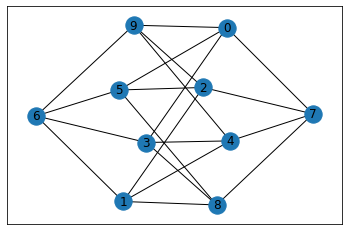

In [15]:
example_CBIP = {0:[3,5,7,9],1:[2,4,6,8],2:[1,5,7,9],3:[0,4,6,8],4:[1,3,7,9],5:[0,2,6,8],6:[1,3,5,9],7:[0,2,4,8],8:[1,3,5,7],9:[0,2,4,6]}
matrix, G = generate_graph_from_dictionnary(example_CBIP)

In [16]:
print("##########FOR 6 VERTICES REVEALED###########")
print("####METHOD 1 (we don't use the given colours)")
print(CBIP_method2(5,matrix))
print("####METHOD 2 (we use the given colours)")
print(CBIP_method3(5,matrix))

##########FOR 6 VERTICES REVEALED###########
####METHOD 1 (we don't use the given colours)
[1, 1, 2, 2, 3, 4]
####METHOD 2 (we use the given colours)
[1, 1, 2, 2, 3, 3]


In [17]:
print("##########FOR 9 VERTICES REVEALED###########")
print("####METHOD 1 (we don't use the given colours)")
print(CBIP_method2(9,matrix))
print("####METHOD 2 (we use the given colours)")
print(CBIP_method3(9,matrix))

##########FOR 9 VERTICES REVEALED###########
####METHOD 1 (we don't use the given colours)
[1, 1, 2, 2, 3, 4, 3, 4, 3, 4]
####METHOD 2 (we use the given colours)
[1, 1, 2, 2, 3, 3, 4, 4, 5, 5]


# Graph Generator with CBIP

Generation of a set of graph

In [18]:
def g_generator(Number_of_graphs, numb_vertices, chromatic_num):
  cnt = 0
  graphs = []
  all_ps = []
  n = numb_vertices
  while(cnt < Number_of_graphs):
    if cnt% 5 == 0:
      print("ok",cnt)
    # p = random.random()
    # p_int = int(p * n)
    p1 = random.random()
    all_ps.append(p1)
    # colors = np.zeros(n)
    # colors[np.random.choice(n,p_int)] = 1


    #logicaly this block is needed! but in practice it is better and faster to ignore that!
    while(True):
      colors = np.random.randint(chromatic_num, size=n)
      unique_integers = np.unique(colors)
      if len(unique_integers) == chromatic_num:
        break

    result = []
    for h in unique_integers:    
      indices = np.where(colors == h)[0]
      random_index = np.random.choice(indices)
      result.append(random_index)

    G = nx.Graph()
    G.add_nodes_from(range(n))
    ## just to be sure we have all connected k vertices
    for i in range(chromatic_num):
      for j in range(i+1, chromatic_num):
              G.add_edge(result[i], result[j])

    for i in range(n):
        for j in range(i+1,n):      #(i+1, n)   
            if random.random() < p1 and colors[i] !=colors[j]:
                G.add_edge(i, j)
    cnt +=1
    graphs.append(G)
  # print(all_ps)
  return graphs

In [19]:
N = 100
n = 10
chromatic_num = 3
set_of_graphs = g_generator(N, n, chromatic_num)

ok 0
ok 5
ok 10
ok 15
ok 20
ok 25
ok 30
ok 35
ok 40
ok 45
ok 50
ok 55
ok 60
ok 65
ok 70
ok 75
ok 80
ok 85
ok 90
ok 95


Test on all the graphs

In [20]:
def get_ratio(ratio,colors,chromatic_number):
  new = max(colors)/chromatic_number
  ratio.append(new)
  return(ratio)

In [21]:
ratio_method2 = []
ratio_method3 = []
count = 0
for graph in set_of_graphs:
  print(count)
  count +=1
  if count%5==0:
    #print("ratio 1 = ",ratio_method2)
    print("ratio 3 = ",ratio_method3)
  matrix = nx.to_scipy_sparse_array(graph).todense()
  ratio_method2 = get_ratio(ratio_method2,CBIP_method2(n-1,matrix),chromatic_num)
  ratio_method3 = get_ratio(ratio_method3,CBIP_method3(n-1,matrix),chromatic_num)
print("---------FOR METHOD 1----------")
print(ratio_method2)
print("Maximum ratio for method 1 = ",np.max(np.array(ratio_method2))," and mean = ",np.mean(np.array(ratio_method2)))
print("---------FOR METHOD 2----------")
print(ratio_method3)
print("Maximum ratio for method 3 = ",np.max(np.array(ratio_method3))," and mean = ",np.mean(np.array(ratio_method3)))
print("---------DIFFERENCE 2 - 3 ----------")
diff = np.array(ratio_method2)-np.array(ratio_method3)
print(diff)
print("Maximum difference of ratio = ",np.max(diff)," and mean = ",np.mean(diff))


0
1
2
3
4
ratio 3 =  [1.0, 1.0, 1.3333333333333333, 1.0]
5
6
7
8
9
ratio 3 =  [1.0, 1.0, 1.3333333333333333, 1.0, 1.3333333333333333, 1.0, 1.0, 1.0, 1.0]
10
11
12
13
14
ratio 3 =  [1.0, 1.0, 1.3333333333333333, 1.0, 1.3333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
15
16
17
18
19
ratio 3 =  [1.0, 1.0, 1.3333333333333333, 1.0, 1.3333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.3333333333333333, 1.0, 1.0, 1.0]
20
21
22
23
24
ratio 3 =  [1.0, 1.0, 1.3333333333333333, 1.0, 1.3333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.3333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
25
26
27
28
29
ratio 3 =  [1.0, 1.0, 1.3333333333333333, 1.0, 1.3333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.3333333333333333, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.3333333333333333, 1.0]
30
31
32
33
34
ratio 3 =  [1.0, 1.0, 1.3333333333333333, 1.0, 1.3333333333333333, 1

In [22]:
print("mean for method 2 = ",np.mean(ratio_method2), " and for method 3 = ",np.mean(ratio_method3))
print("STD for method 2 = ",np.std(ratio_method2), " and for method 3 = ",np.std(ratio_method3))

mean for method 2 =  1.2466666666666668  and for method 3 =  1.09
STD for method 2 =  0.2191904296369813  and for method 3 =  0.16901676445449623
